<a href="https://colab.research.google.com/github/Thanyarat281-6/BSC_DPDM2025/blob/main/Ch_3_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
flood1 = pd.read_csv('/content/drive/MyDrive/DataMining2025 2 /สำเนาของ flooding database.csv')
flood1.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


# Data Cleaning



## Missing Data

### check missing data

In [4]:
flood1.isnull().any()

,0
system:index,False
index,False
threshold_type,False
glide_index,True
dfo_country,False
dfo_other_country,True
dfo_centroid_x,False
dfo_centroid_y,False
dfo_began,False
dfo_ended,True


In [5]:
flood1.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


###Drop Record ที่มี  missing ออก

drop ค่า missing

In [6]:
flood1.shape

(913, 23)

In [7]:
flood_drop1 = flood1.dropna()

In [8]:
flood_drop1

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
7,DFO_1725_From_20010512_to_20010608,1725,std,0,Russia,0,106.619051,58.489746,5/12/01,6/8/01,...,"Snowmelt, Ice, Rain",2.0,35430.05,57438.0,57438.0,67466,1,0,-10028,1.0
83,DFO_2117_From_20030101_to_20030108,2117,otsu,0,Germany,Portugal,5.625135,49.207412,1/1/03,1/8/03,...,Heavy rain,1.0,5305.10,1242069.0,1242069.0,1307003,1,0,-64934,1.0
123,DFO_2208_From_20030416_to_20030528,2208,std,0,Russia,0,64.739289,55.453563,4/16/03,5/28/03,...,"Snowmelt, Ice, Rain",1.0,98547.62,1014245.0,1014245.0,931108,1,0,83137,1.0
125,DFO_2214_From_20030423_to_20030513,2214,std,0,Russia,0,79.316216,57.820476,4/23/03,5/13/03,...,"Snowmelt, Ice, Rain",1.0,54899.72,260971.0,260971.0,240926,1,0,20045,1.0
128,DFO_2221_From_20030501_to_20030516,2221,otsu,0,Russia,0,42.394583,63.531266,5/1/03,5/16/03,...,"Snowmelt, Ice, Rain",1.0,10025.00,76356.0,76356.0,71151,1,0,5205,1.0
143,DFO_2296_From_20030727_to_20031010,2296,std,0,China,0,124.701838,47.943961,7/27/03,10/10/03,...,Heavy rain,1.0,13836.29,567968.0,567968.0,743429,1,0,-175461,1.0
198,DFO_2471_From_20040414_to_20040516,2471,std,0,Russia,0,86.610210,51.975446,4/14/04,5/16/04,...,"Snowmelt, Ice, Rain",1.0,28026.03,317137.0,317137.0,301011,1,0,16126,1.0
262,DFO_2688_From_20050701_to_20050812,2688,std,0,China,0,125.500543,44.562689,7/1/05,8/12/05,...,Heavy rain,1.0,5007.34,134044.0,134044.0,221285,1,0,-87241,1.0
326,DFO_2851_From_20060421_to_20060531,2851,std,0,Russia,0,87.143833,50.775179,4/21/06,5/31/06,...,"Snowmelt, Ice, Rain",1.0,41144.57,555571.0,555571.0,522773,1,0,32798,1.0


### drop เฉพาะ เกิด missing ในตัวแปรที่เราจะใช้

- dfo_country
- dfo_other_country
- dfo_began
- dfo_ended
- dfo_dead
- dfo_cause
- dfo_severity


In [9]:
flood_drop2 = flood1.dropna(subset=['dfo_country', 'dfo_other_country', 'dfo_began', 'dfo_ended', 'dfo_dead', 'dfo_cause', 'dfo_severity'])
flood_drop2.shape

(637, 23)

In [10]:
flood_drop2.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


### เติม dummy

In [11]:
flood1

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,NaN,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,NaN,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,NaN,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,NaN,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


In [12]:
flood1[flood1.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
172,DFO_2415_From_20040110_to_20040119,2415,std,0,Iran,NaN,51.439491,29.466641,1/10/04,1/19/04,...,Heavy rain,1.0,7017.61,23986.0,23986.0,116060,1,0,-92074,NaN
383,DFO_3089_From_20070530_to_20070603,3089,std,0,Dominican Republic,NaN,-71.053795,19.547861,5/30/07,6/3/07,...,Heavy rain,1.0,100.92,13819.0,13819.0,11672,1,0,2147,NaN
387,DFO_3097_From_20070611_to_20070624,3097,std,LS-2007-000080-BGD,Bangladesh,NaN,91.953546,22.397464,6/11/07,6/24/07,...,Heavy rain,1.0,20493.38,4536692.0,4536692.0,8995159,1,0,-4458467,NaN
412,DFO_3136_From_20070721_to_20071015,3136,std,0,Bangladesh,NaN,91.233643,23.916419,7/21/07,10/15/07,...,Heavy rain,1.0,78785.53,27712991.0,27712998.0,55288622,0,-7,-27575631,NaN
428,DFO_3166_From_20070726_to_20071010,3166,std,FL-2007-000132-BFA,Ghana,NaN,0.612005,13.037658,7/26/07,10/10/07,...,Heavy rain,1.5,7621.96,325408.0,325408.0,624312,1,0,-298904,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,NaN,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,NaN,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,NaN,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,NaN,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


In [13]:
flood_filldummy = flood1.fillna({'dfo_other_country': 'unknown'})

### เติม missing ด้วยค่ากลาง

In [14]:
flood1.groupby('dfo_cause').count()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_displaced,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
dfo_cause,,,,,,,,,,,,,,,,,,,,,
Dam,13,13,13,11,13,10,13,13,13,13,...,13,13,13,13,13,13,13,13,13,0
Heavy rain,749,749,749,554,749,530,749,749,749,748,...,749,749,749,748,748,749,749,749,749,16
"Snowmelt, Ice, Rain",52,52,52,45,52,45,52,52,52,52,...,52,52,52,52,52,52,52,52,52,7
"Tropical Storm, Surge",97,97,97,71,97,53,97,97,97,97,...,97,97,97,97,97,97,97,97,97,1


In [15]:
flood_fillmode = flood1.fillna({'dfo_other_cause': 'Heavy rain'})

In [16]:
flood_fillmode.isnull().any()

,0
system:index,False
index,False
threshold_type,False
glide_index,True
dfo_country,False
dfo_other_country,True
dfo_centroid_x,False
dfo_centroid_y,False
dfo_began,False
dfo_ended,True


### เติม Missing ด้วยตัวแทนของกลุ่ม

In [22]:
flood1.groupby(['dfo_severity','dfo_cause']).count()

system:index  index  threshold_type  \
dfo_severity dfo_cause                                                    
1.0          Dam                               9      9               9   
             Heavy rain                      464    464             464   
             Snowmelt, Ice, Rain              34     34              34   
             Tropical Storm, Surge            33     33              33   
1.5          Dam                               3      3               3   
             Heavy rain                      163    163             163   
             Snowmelt, Ice, Rain               8      8               8   
             Tropical Storm, Surge            26     26              26   
2.0          Dam                               1      1               1   
             Heavy rain                      122    122             122   
             Snowmelt, Ice, Rain              10     10              10   
             Tropical Storm, Surge            38     38              38   

                                    glide_index  dfo_country  \
dfo_severity dfo_cause                                         
1.0          Dam                              9            9   
             Heavy rain                     390          464   
             Snowmelt, Ice, Rain             29           34   
             Tropical Storm, Surge           32           33   
1.5          Dam                              1            3   
             Heavy rain                      72          163   
             Snowmelt, Ice, Rain              7            8   
             Tropical Storm, Surge           12           26   
2.0          Dam                              1            1   
             Heavy rain                      92          122   
             Snowmelt, Ice, Rain              9           10   
             Tropical Storm, Surge           27           38   

                                    dfo_other_country  dfo_centroid_x  \
dfo_severity dfo_cause                                                  
1.0          Dam                                    9               9   
             Heavy rain                           369             464   
             Snowmelt, Ice, Rain                   30              34   
             Tropical Storm, Surge                 28              33   
1.5          Dam                                    0               3   
             Heavy rain                            67             163   
             Snowmelt, Ice, Rain                    6               8   
             Tropical Storm, Surge                  7              26   
2.0          Dam                                    1               1   
             Heavy rain                            94             122   
             Snowmelt, Ice, Rain                    9              10   
             Tropical Storm, Surge                 18              38   

                                    dfo_centroid_y  dfo_began  dfo_ended  ...  \
dfo_severity dfo_cause                                                    ...   
1.0          Dam                                 9          9          9  ...   
             Heavy rain                        464        464        463  ...   
             Snowmelt, Ice, Rain                34         34         34  ...   
             Tropical Storm, Surge              33         33         33  ...   
1.5          Dam                                 3          3          3  ...   
             Heavy rain                        163        163        163  ...   
             Snowmelt, Ice, Rain                 8          8          8  ...   
             Tropical Storm, Surge              26         26         26  ...   
2.0          Dam                                 1          1          1  ...   
             Heavy rain                        122        122        122  ...   
             Snowmelt, Ice, Rain                10         10         10  ...   
            

In [23]:
flood_sever1 = flood1[flood1['dfo_severity']==1.0]
flood_sever2 = flood1[flood1['dfo_severity']==1.5]
flood_sever3 = flood1[flood1['dfo_severity']==2.0]


In [24]:
flood_sever1 = flood_sever1.fillna({'dfo_cause': 'Heavy rain'})
flood_sever2 = flood_sever2.fillna({'dfo_cause': 'Heavy rain'})
flood_sever3 = flood_sever3.fillna({'dfo_cause': 'Tropical Storm, Surge'})

In [26]:
flood_fillgroup = pd.concat([flood_sever1, flood_sever2, flood_sever3])

In [25]:
flood_fillgroup.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


##Noisy Data

In [28]:
flood1['gfd_area']

,gfd_area
0,316.73
1,228.50
2,89.10
3,4322.47
4,740.33
...,...
908,1866.91
909,2720.37
910,10019.87
911,6467.41


Exporl data

In [30]:
import matplotlib.pyplot as plt

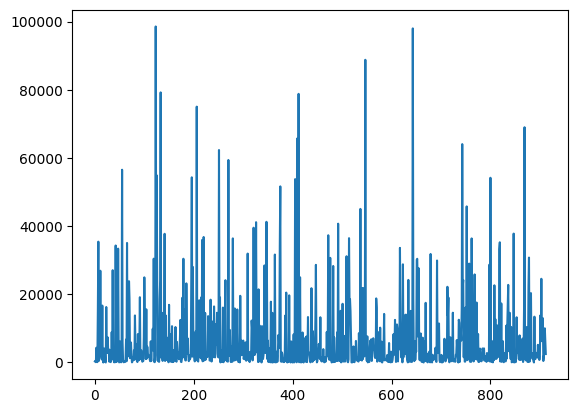

In [31]:
plt.plot(flood1['gfd_area'])

###Binning

ใช้ histogram ดู Bin ที่เหมาะสม

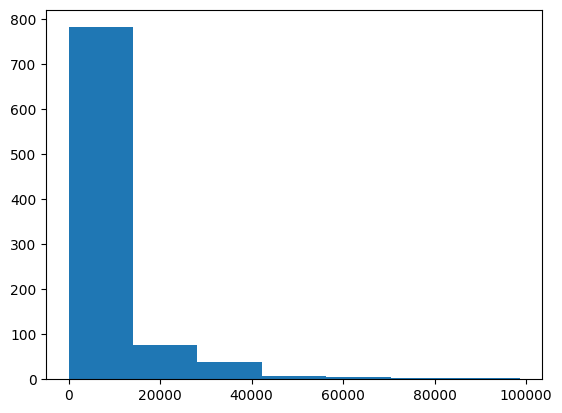

In [84]:
outputhist = plt.hist(flood1['gfd_area'],7)

In [85]:
outputhist

(array([781.,  75.,  38.,   7.,   6.,   3.,   3.]),
 array([    0.        , 14078.23142857, 28156.46285714, 42234.69428571,
        56312.92571429, 70391.15714286, 84469.38857143, 98547.62      ]),
 <BarContainer object of 7 artists>)

In [86]:
outputhist[1]

array([    0.        , 14078.23142857, 28156.46285714, 42234.69428571,
       56312.92571429, 70391.15714286, 84469.38857143, 98547.62      ])

In [87]:
def put_value_into_bin(value, bin_edge):
    for i in range(len(bin_edge)-1):
       if value >= bin_edge[i] and value < bin_edge[i+1]:
          new_val = bin_edge[1] + (bin_edge[i+1]-bin_edge[1])/2
          return new_val
    return None

In [88]:
put_value_into_bin(3000,outputhist[1])

np.float64(14078.231428571427)

In [89]:
flood1['gfd_area_bin']= flood1['gfd_area'].apply(lambda x: put_value_into_bin(x,outputhist[1]))

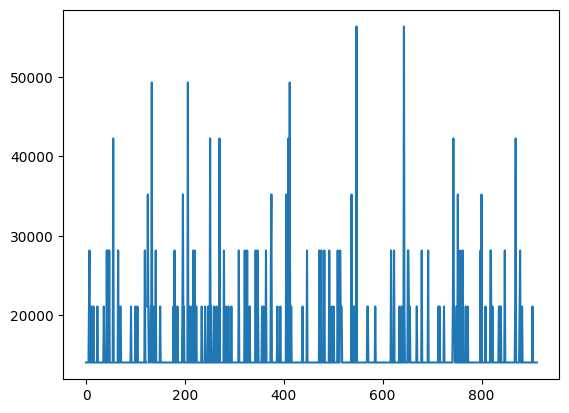

In [90]:
plt.plot(flood1['gfd_area_bin'])

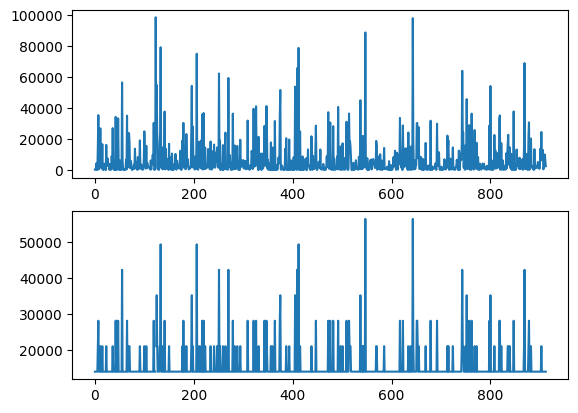

In [91]:
plt.subplot(2,1,1)
plt.plot(flood1['gfd_area'])
plt.subplot(2,1,2)
plt.plot(flood1['gfd_area_bin'])

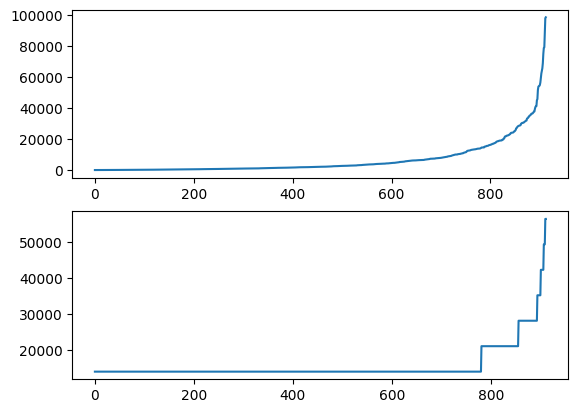

In [92]:
plt.subplot(2,1,1)
plt.plot(flood1['gfd_area'].sort_values().reset_index(drop=True))
plt.subplot(2,1,2)
plt.plot(flood1['gfd_area_bin'].sort_values().reset_index(drop=True))

###Clustering (Outlier Remove)

{'whiskers': [<matplotlib.lines.Line2D at 0x7e0fc9a02810>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0fc9a02de0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0fc99f6330>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0fc9a03380>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0fc9a03680>],
 'means': []}

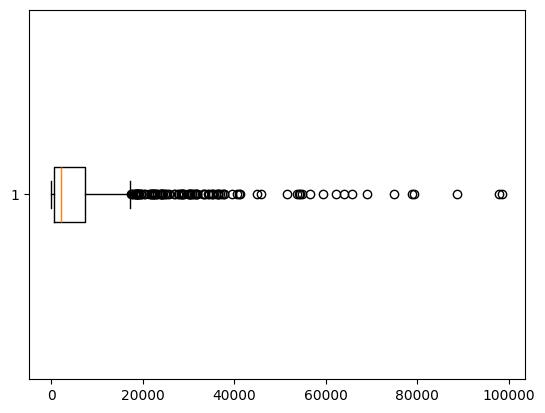

In [116]:
plt.boxplot(flood1['gfd_area'],vert=False)

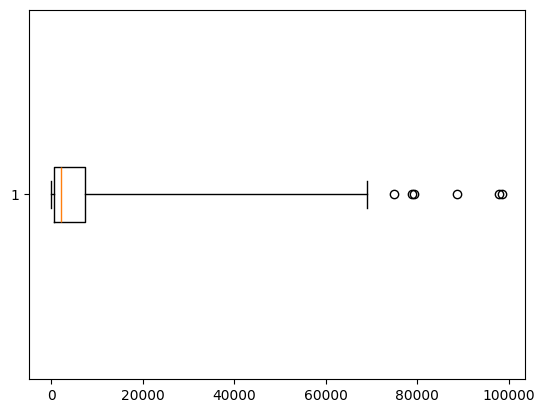

In [117]:
outputbox = plt.boxplot(flood1['gfd_area'],vert=False,whis=10);

In [118]:
outputbox

{'whiskers': [<matplotlib.lines.Line2D at 0x7e0fc9b96bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0fc9b97170>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0fc9b96960>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0fc9b975f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0fc9b978c0>],
 'means': []}

In [105]:
outputbox['whiskers'][0].get_xdata()

array([608.6,   0. ])

In [104]:
outputbox['whiskers'][1].get_xdata()

array([ 7354.55, 68991.93])

In [107]:
outputbox['fliers'][0].get_xdata()

array([98547.62, 79213.43, 75030.8 , 78785.53, 88773.57, 97982.77])

remove outliers

In [108]:
flood_nooutliers = flood1[flood1['gfd_area']< outputbox['whiskers'][1].get_xdata()[1]]

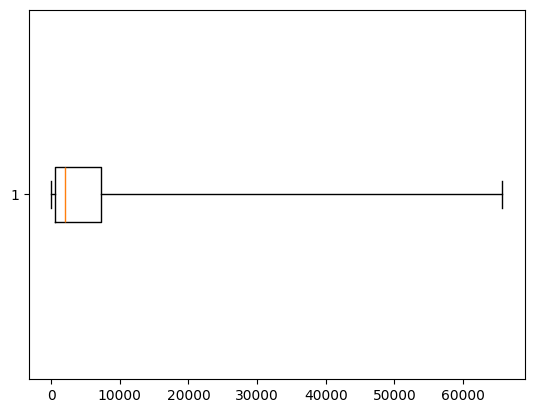

In [119]:
outoutbox2 = plt.boxplot(flood_nooutliers['gfd_area'],vert=False,whis=10);

ตามหาค่า outliers

In [120]:
flood1[flood1['gfd_area'] == outputbox['fliers'][0].get_xdata()[0]]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000,gfd_area_bin
123,DFO_2208_From_20030416_to_20030528,2208,std,0,Russia,0,64.739289,55.453563,4/16/03,5/28/03,...,1.0,98547.62,1014245.0,1014245.0,931108,1,0,83137,1.0,NaN
